In [36]:

import pandas as pd
import numpy as np

from datetime import datetime

from sklearn.pipeline import Pipeline
from sklearn import metrics


import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [37]:
# !pip install autoviz
# from autoviz.AutoViz_Class import AutoViz_Class  


In [38]:
data = pd.read_csv("TRAIN.csv", index_col=0, parse_dates=['Date'])
unseen = pd.read_csv("TEST_FINAL.csv",index_col=0, parse_dates=['Date'])

print(data.shape)
print(unseen.shape)

(188340, 9)
(22265, 7)


In [39]:
data.head()

Store_id Store_Type Location_Type Region_Code       Date  Holiday  \
ID                                                                            
T1000001         1         S1            L3          R1 2018-01-01        1   
T1000002       253         S4            L2          R1 2018-01-01        1   
T1000003       252         S3            L2          R1 2018-01-01        1   
T1000004       251         S2            L3          R1 2018-01-01        1   
T1000005       250         S2            L3          R4 2018-01-01        1   

         Discount  #Order     Sales  
ID                                   
T1000001      Yes       9   7011.84  
T1000002      Yes      60  51789.12  
T1000003      Yes      42  36868.20  
T1000004      Yes      23  19715.16  
T1000005      Yes      62  45614.52

In [40]:
data = data.sort_values(['Date', 'Store_id'], ascending=[True, True])

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 188340 entries, T1000001 to T1187984
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Store_id       188340 non-null  int64         
 1   Store_Type     188340 non-null  object        
 2   Location_Type  188340 non-null  object        
 3   Region_Code    188340 non-null  object        
 4   Date           188340 non-null  datetime64[ns]
 5   Holiday        188340 non-null  int64         
 6   Discount       188340 non-null  object        
 7   #Order         188340 non-null  int64         
 8   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 14.4+ MB


In [42]:
# percentage of missing values in each column
round(100*(data.isnull().sum()/len(data)), 2).sort_values(ascending=False)

Store_id         0.0
Store_Type       0.0
Location_Type    0.0
Region_Code      0.0
Date             0.0
Holiday          0.0
Discount         0.0
#Order           0.0
Sales            0.0
dtype: float64

In [43]:
data_dup = data.copy()

# Checking for duplicates and dropping the entire duplicate row if any
data_dup.drop_duplicates(subset=None, inplace=True)
print(data.shape)
print(data_dup.shape)

(188340, 9)
(188340, 9)


In [44]:
data.head()

Store_id Store_Type Location_Type Region_Code       Date  Holiday  \
ID                                                                            
T1000001         1         S1            L3          R1 2018-01-01        1   
T1000115         2         S3            L1          R3 2018-01-01        1   
T1000128         3         S4            L2          R1 2018-01-01        1   
T1000097         4         S1            L1          R2 2018-01-01        1   
T1000133         5         S1            L1          R3 2018-01-01        1   

         Discount  #Order     Sales  
ID                                   
T1000001      Yes       9   7011.84  
T1000115      Yes      25  18137.52  
T1000128      Yes      72  57288.00  
T1000097      Yes      80  53615.52  
T1000133      Yes      47  36316.08

In [45]:
data.Store_Type.value_counts()

S1    88752
S4    45924
S2    28896
S3    24768
Name: Store_Type, dtype: int64

In [46]:
data.Location_Type.value_counts()

L1    85140
L2    48504
L3    29928
L5    13932
L4    10836
Name: Location_Type, dtype: int64

In [47]:
data.Region_Code.value_counts()

R1    63984
R2    54180
R3    44376
R4    25800
Name: Region_Code, dtype: int64

In [48]:
train      = data[data['Date']<= datetime(2018,12,31)]
validation = data[data['Date']> datetime(2018,12,31)]

print(train.shape)
print(validation.shape)

(133225, 9)
(55115, 9)


In [49]:
# Average sales by store_id
avg_sales_by_store_id = train.groupby(["Store_id"])["Sales"].median().to_dict()

In [50]:
train["Store_id"].replace(avg_sales_by_store_id, inplace=True)

In [51]:
train["Discount"].replace({'Yes':1,'No':0}, inplace=True)

In [52]:
eda_data_new=train.copy()

In [53]:
num_cols=list(train.columns)
print(num_cols)

['Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date', 'Holiday', 'Discount', '#Order', 'Sales']


In [54]:
def encode_and_bind(original_dataframe, feature_to_encode):
    dummies = pd.get_dummies(original_dataframe[[feature_to_encode]],drop_first=True)
    res = pd.concat([original_dataframe, dummies], axis=1)
    return(res)

train = encode_and_bind(train,"Store_Type")
train = encode_and_bind(train,"Location_Type")
train = encode_and_bind(train,"Region_Code")

train.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

In [55]:
train.head()

Store_id       Date  Holiday  Discount  #Order     Sales  \
ID                                                                   
T1000001   34206.0 2018-01-01        1         1       9   7011.84   
T1000115   45045.0 2018-01-01        1         1      25  18137.52   
T1000128   59613.0 2018-01-01        1         1      72  57288.00   
T1000097   38220.0 2018-01-01        1         1      80  53615.52   
T1000133   41928.0 2018-01-01        1         1      47  36316.08   

          Store_Type_S2  Store_Type_S3  Store_Type_S4  Location_Type_L2  \
ID                                                                        
T1000001              0              0              0                 0   
T1000115              0              1              0                 0   
T1000128              0              0              1                 1   
T1000097              0              0              0                 0   
T1000133              0              0              0                 0   

          Location_Type_L3  Location_Type_L4  Location_Type_L5  \
ID                                                               
T1000001                 1                 0                 0   
T1000115                 0                 0                 0   
T1000128                 0                 0                 0   
T1000097                 0                 0                 0   
T1000133                 0                 0                 0   

          Region_Code_R2  Region_Code_R3  Region_Code_R4  
ID                                                        
T1000001               0               0               0  
T1000115               0               1               0  
T1000128               0               0               0  
T1000097               1               0               0  
T1000133               0               1               0

## Feature Engineering

In [56]:
train['Month'] = train['Date'].dt.month
train['Day'] = train['Date'].dt.day
train['Dayofyear'] = train['Date'].dt.dayofyear
train['Weekofyear'] = train['Date'].dt.weekofyear
train['Dayofweek'] = train['Date'].dt.dayofweek
train['is_month_start'] = train['Date'].dt.is_month_start.astype(int)
train['is_month_end'] = train['Date'].dt.is_month_end.astype(int)
train['is_quarter_start'] = train['Date'].dt.is_quarter_start.astype(int)
train['is_quarter_end'] = train['Date'].dt.is_quarter_end.astype(int)

In [57]:
train.head()

Store_id       Date  Holiday  Discount  #Order     Sales  \
ID                                                                   
T1000001   34206.0 2018-01-01        1         1       9   7011.84   
T1000115   45045.0 2018-01-01        1         1      25  18137.52   
T1000128   59613.0 2018-01-01        1         1      72  57288.00   
T1000097   38220.0 2018-01-01        1         1      80  53615.52   
T1000133   41928.0 2018-01-01        1         1      47  36316.08   

          Store_Type_S2  Store_Type_S3  Store_Type_S4  Location_Type_L2  ...  \
ID                                                                       ...   
T1000001              0              0              0                 0  ...   
T1000115              0              1              0                 0  ...   
T1000128              0              0              1                 1  ...   
T1000097              0              0              0                 0  ...   
T1000133              0              0              0                 0  ...   

          Region_Code_R4  Month  Day  Dayofyear  Weekofyear  Dayofweek  \
ID                                                                       
T1000001               0      1    1          1           1          0   
T1000115               0      1    1          1           1          0   
T1000128               0      1    1          1           1          0   
T1000097               0      1    1          1           1          0   
T1000133               0      1    1          1           1          0   

          is_month_start  is_month_end  is_quarter_start  is_quarter_end  
ID                                                                        
T1000001               1             0                 1               0  
T1000115               1             0                 1               0  
T1000128               1             0                 1               0  
T1000097               1             0                 1               0  
T1000133               1             0                 1               0  

[5 rows x 25 columns]

<AxesSubplot:xlabel='Store_id', ylabel='Density'>

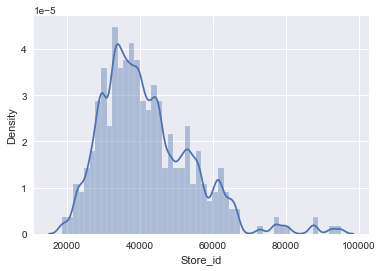

In [58]:
sns.distplot(train['Store_id'])

<AxesSubplot:xlabel='Sales', ylabel='Density'>

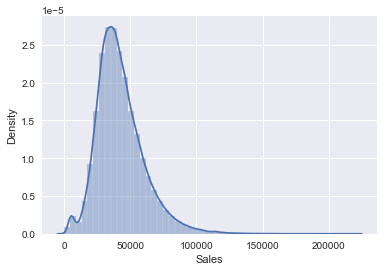

In [59]:
#sns.pairplot(train,corner=True,diag_kind='kde')
sns.distplot(train['Sales'])

<AxesSubplot:ylabel='Density'>

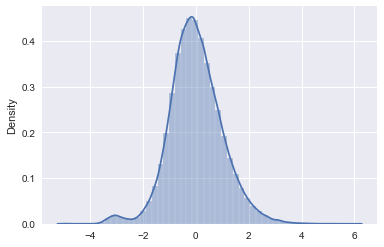

In [60]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

sales_transform = pt.fit_transform(train['Sales'].values[:,np.newaxis])
sns.distplot(sales_transform)

In [61]:
train.head()

Store_id       Date  Holiday  Discount  #Order     Sales  \
ID                                                                   
T1000001   34206.0 2018-01-01        1         1       9   7011.84   
T1000115   45045.0 2018-01-01        1         1      25  18137.52   
T1000128   59613.0 2018-01-01        1         1      72  57288.00   
T1000097   38220.0 2018-01-01        1         1      80  53615.52   
T1000133   41928.0 2018-01-01        1         1      47  36316.08   

          Store_Type_S2  Store_Type_S3  Store_Type_S4  Location_Type_L2  ...  \
ID                                                                       ...   
T1000001              0              0              0                 0  ...   
T1000115              0              1              0                 0  ...   
T1000128              0              0              1                 1  ...   
T1000097              0              0              0                 0  ...   
T1000133              0              0              0                 0  ...   

          Region_Code_R4  Month  Day  Dayofyear  Weekofyear  Dayofweek  \
ID                                                                       
T1000001               0      1    1          1           1          0   
T1000115               0      1    1          1           1          0   
T1000128               0      1    1          1           1          0   
T1000097               0      1    1          1           1          0   
T1000133               0      1    1          1           1          0   

          is_month_start  is_month_end  is_quarter_start  is_quarter_end  
ID                                                                        
T1000001               1             0                 1               0  
T1000115               1             0                 1               0  
T1000128               1             0                 1               0  
T1000097               1             0                 1               0  
T1000133               1             0                 1               0  

[5 rows x 25 columns]

### Visuvalization

In [62]:
train.to_csv("train_for_data_viz.csv")

In [63]:
AV = AutoViz_Class()

Shape of your Data Set loaded: (133225, 26)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
Data Set Shape: 133225 rows, 25 cols
Data Set columns info:
* ID: 0 nulls, 133225 unique vals, most common: {'T1000001': 1, 'T1088888': 1}
* Store_id: 0 nulls, 360 unique vals, most common: {29196.0: 730, 37437.0: 730}
* Date: 0 nulls, 365 unique vals, most common: {'2018-01-01': 365, '2018-09-09': 365}
* Holiday: 0 nulls, 2 unique vals, most common: {0: 116070, 1: 17155}
* Discount: 0 nulls, 2 unique vals, most common: {0: 72321, 1: 60904}
* #Order: 0 nulls, 272 unique vals, most common: {59: 2473, 53: 2418}
* Store_Type_S2: 0 nulls, 2 unique vals, most common: {0: 112785, 1: 20440}
* Store_Type_S3: 0 nulls, 2 unique vals, most common: {0: 115705, 1: 17520}
* Store_Type_S4: 0 nulls, 2 unique vals, most common: {0: 100740, 1: 32485}
* Location_Type_L2: 0 nulls, 2 unique vals, most common: {0: 98915, 1: 34310}
* Location_Type_L3: 

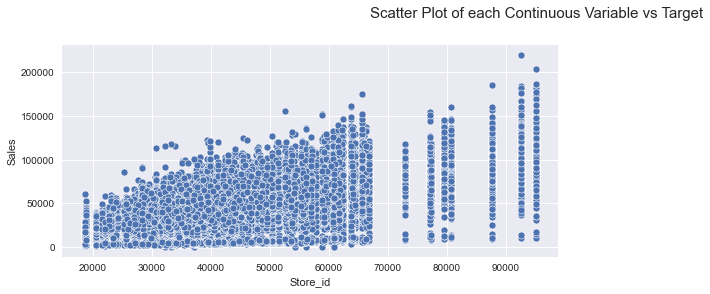

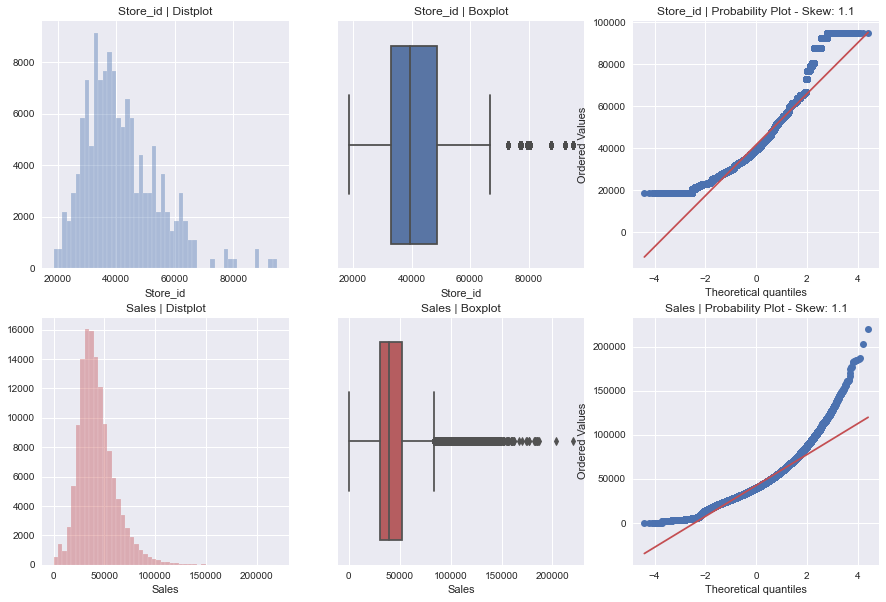

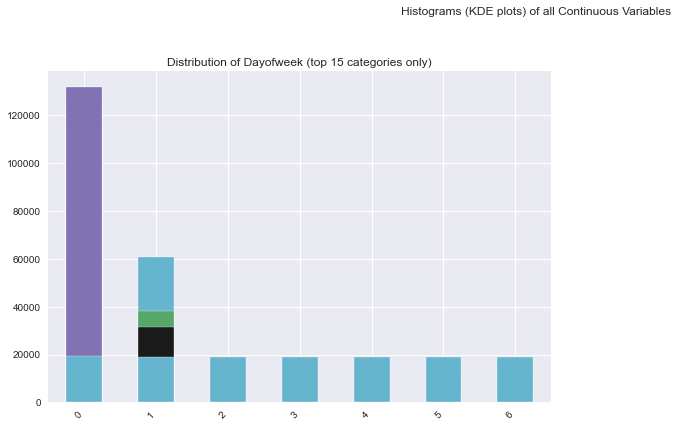

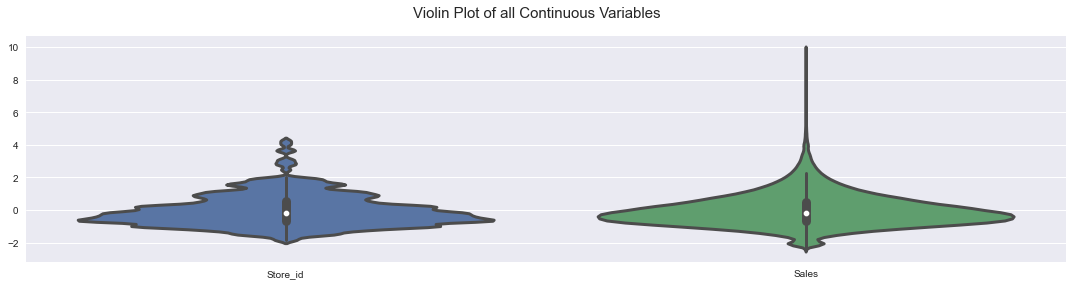

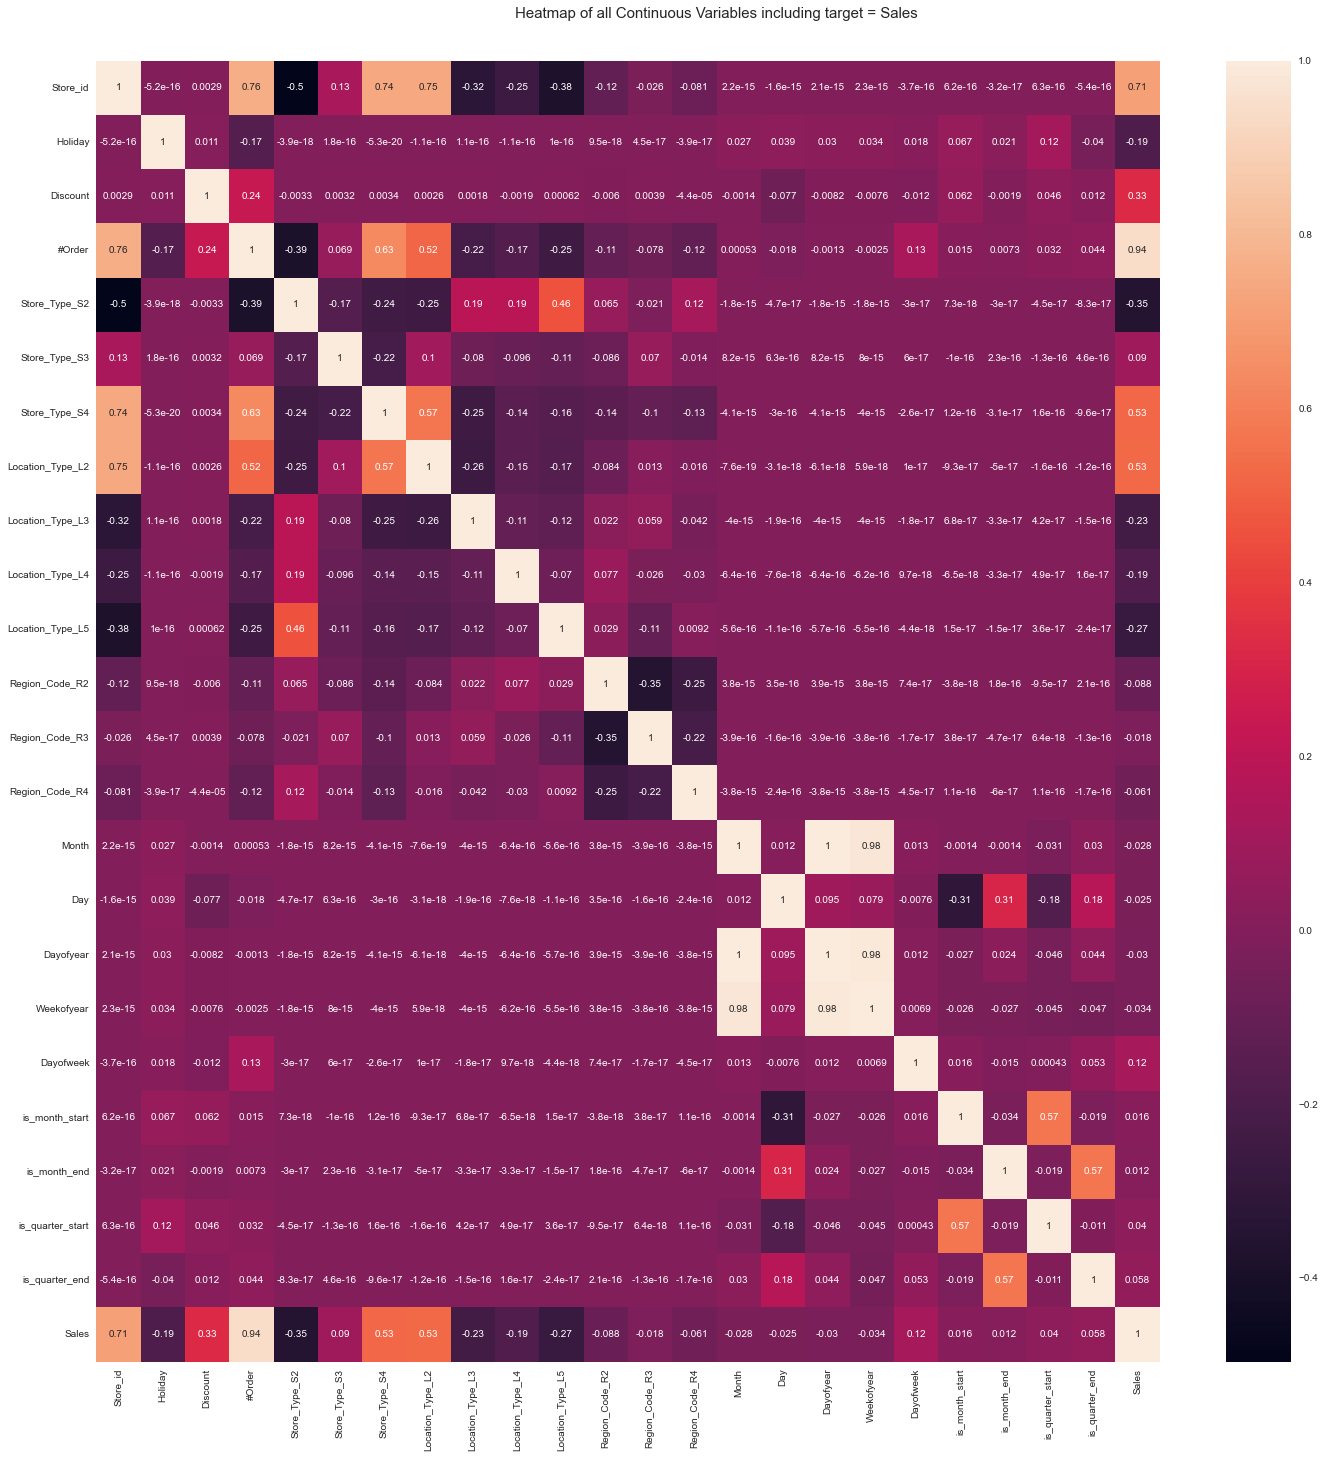

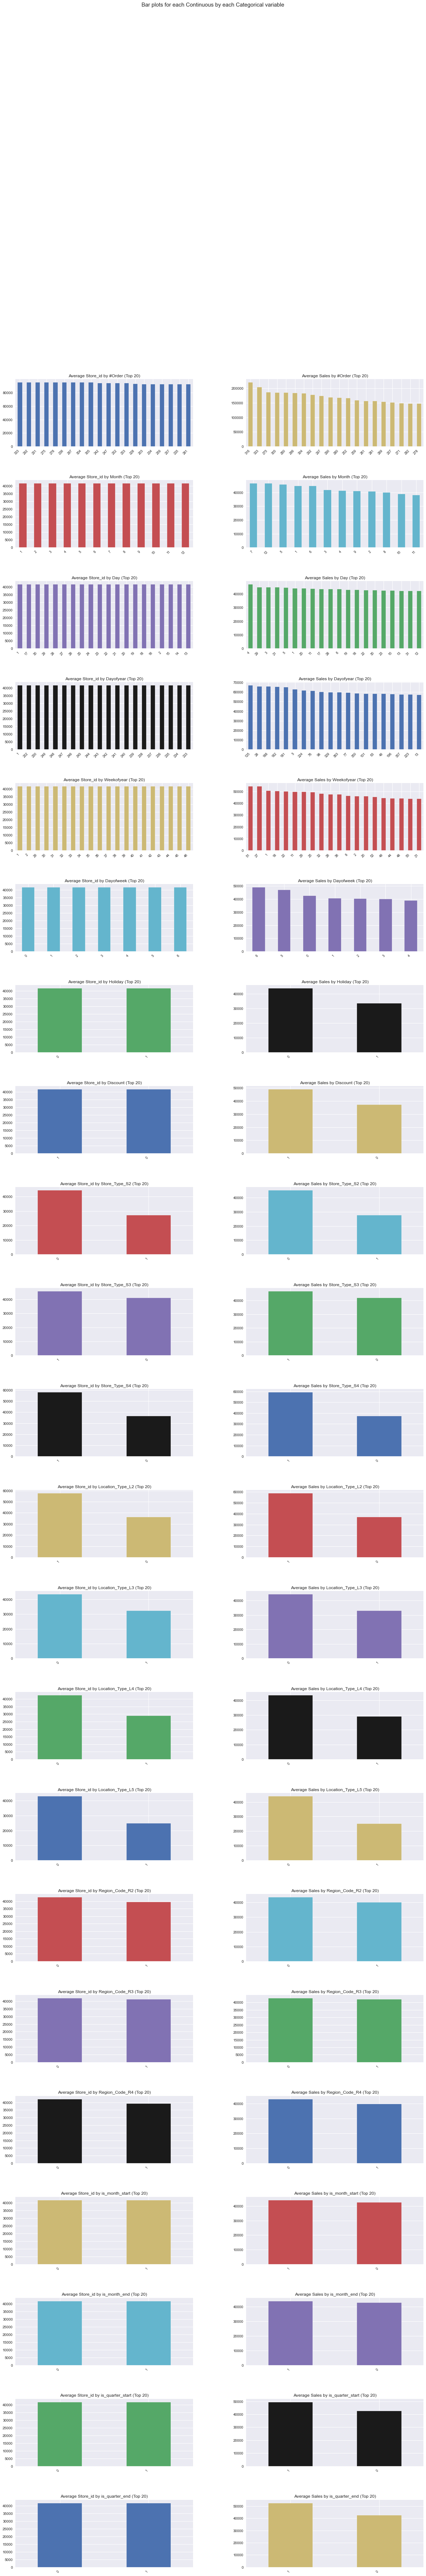

In [65]:
dft = AV.AutoViz("train_for_data_viz.csv",depVar="Sales",dfte=None,header=0,verbose=2,lowess=False,)

In [66]:
eda_data=train.copy()

In [67]:
numerical_cols=list(train.columns)

In [68]:
print(numerical_cols)

['Store_id', 'Date', 'Holiday', 'Discount', '#Order', 'Sales', 'Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4', 'Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4', 'Location_Type_L5', 'Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4', 'Month', 'Day', 'Dayofyear', 'Weekofyear', 'Dayofweek', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']


In [70]:
# plot_cols=['Store_id', 'Holiday', 'Discount', 'Sales', 'Month', 'Day', 'Dayofyear', 'Weekofyear', 'Dayofweek', 'is_month_start', 'is_month_end', 'is_quarter_start', 'is_quarter_end']
# sns.pairplot(train[plot_cols],hue='Sales',corner=True,diag_kind='kde')
# plt.show()

### Univariate Categorical Analysis

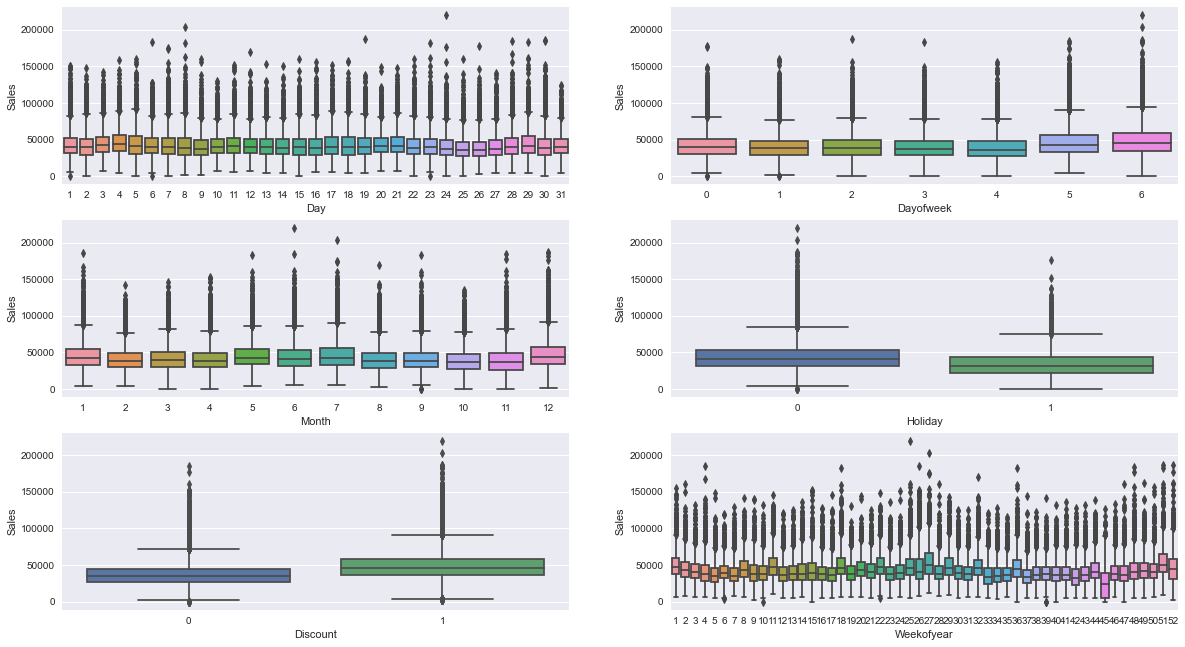

In [71]:
plt.figure(figsize=(20, 15))
plt.subplot(4,2,1)
sns.boxplot(x = 'Day', y = 'Sales', data =eda_data)
plt.subplot(4,2,2)
sns.boxplot(x = 'Dayofweek', y = 'Sales', data =eda_data)
plt.subplot(4,2,3)
sns.boxplot(x = 'Month', y = 'Sales', data =eda_data)
plt.subplot(4,2,4)
sns.boxplot(x = 'Holiday', y = 'Sales', data =eda_data)
plt.subplot(4,2,5)
sns.boxplot(x = 'Discount', y = 'Sales', data =eda_data)
plt.subplot(4,2,6)
sns.boxplot(x = 'Weekofyear', y = 'Sales', data =eda_data)

plt.show()


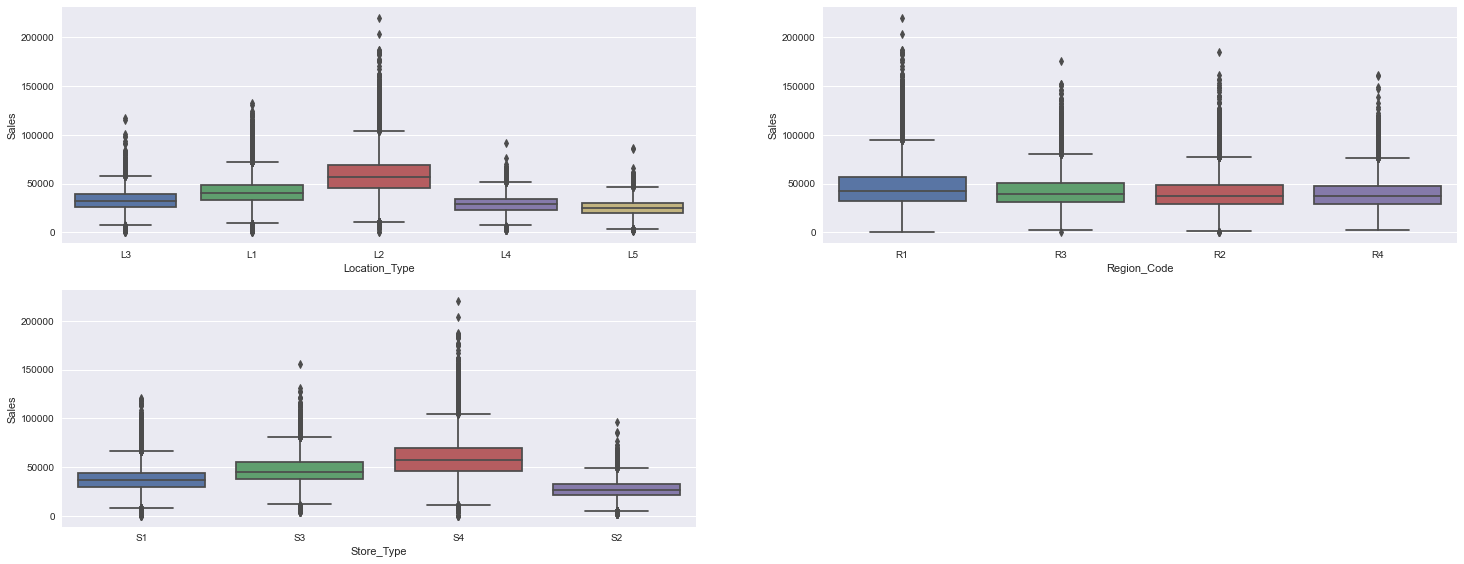

In [72]:
plt.figure(figsize=(25, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'Location_Type', y = 'Sales', data =eda_data_new)
plt.subplot(4,2,2)
sns.boxplot(x = 'Region_Code', y = 'Sales', data =eda_data_new)
plt.subplot(4,2,3)
sns.boxplot(x = 'Store_Type', y = 'Sales', data =eda_data_new)


plt.show()


<AxesSubplot:xlabel='#Order', ylabel='Sales'>

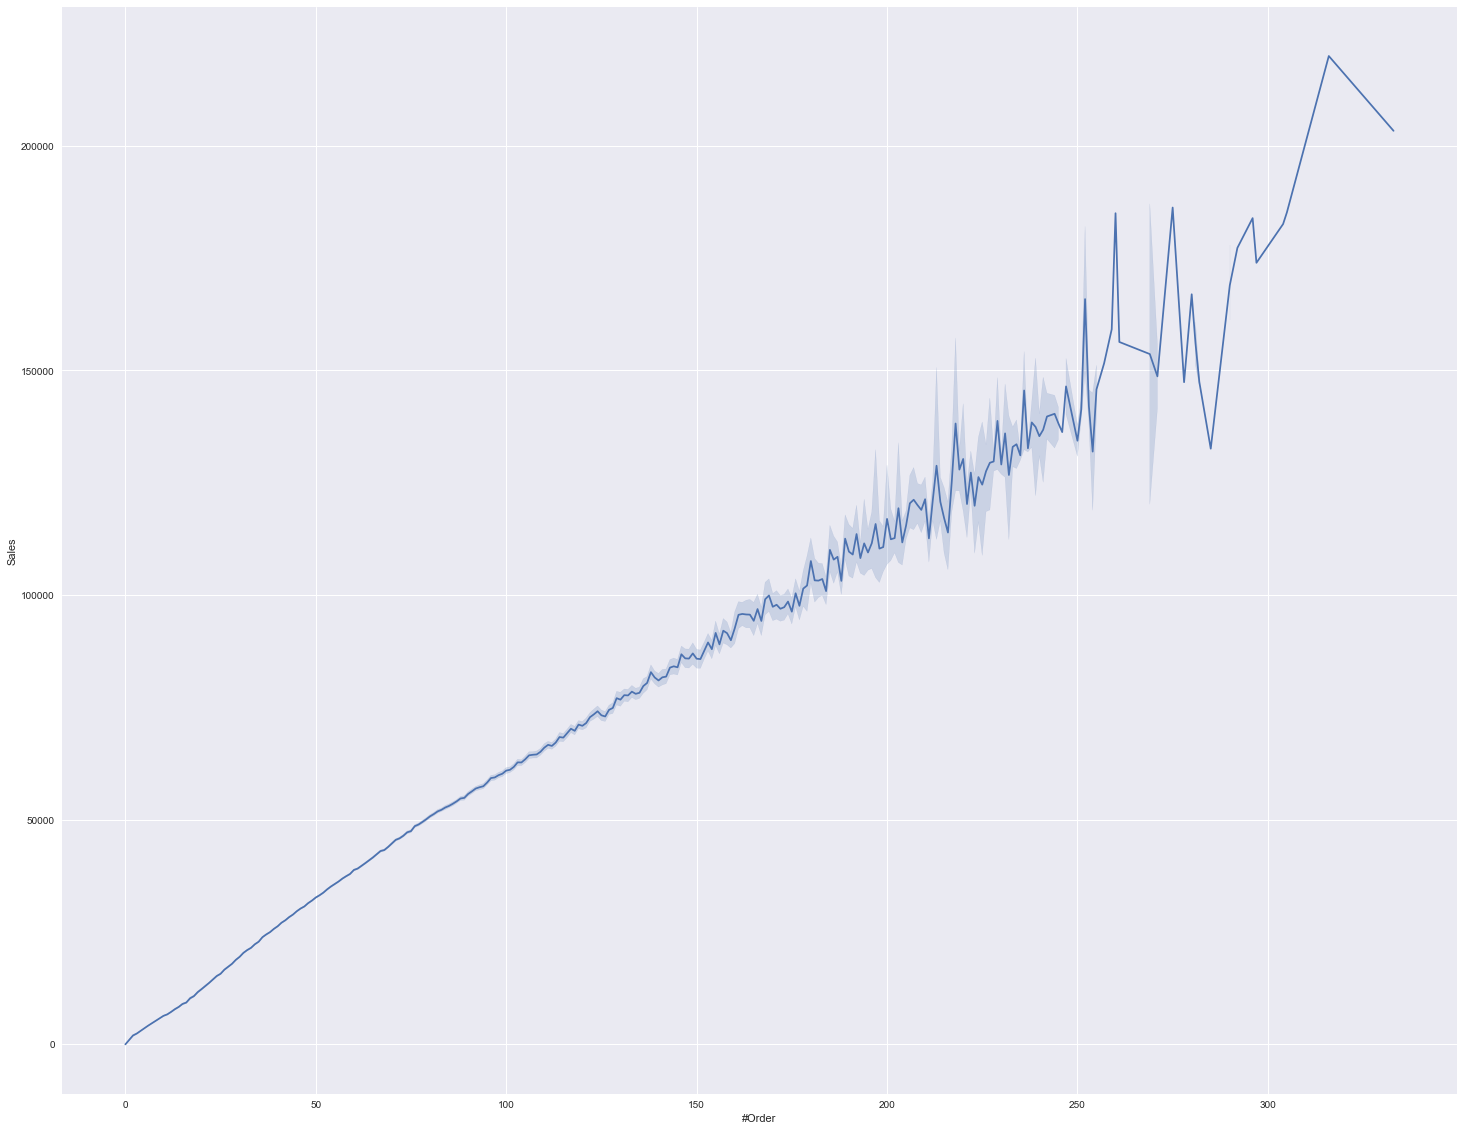

In [73]:
plt.figure(figsize=(25, 20))
sns.lineplot(data=eda_data_new, x="#Order", y="Sales")

In [74]:
train.drop(['Date','#Order'], axis=1, inplace=True)

In [75]:
y_train = pd.Series(np.ravel(sales_transform), index=train.index)
X_train =train.loc[:,train.columns !='Sales']

In [76]:
X_train.head()

Store_id  Holiday  Discount  Store_Type_S2  Store_Type_S3  \
ID                                                                    
T1000001   34206.0        1         1              0              0   
T1000115   45045.0        1         1              0              1   
T1000128   59613.0        1         1              0              0   
T1000097   38220.0        1         1              0              0   
T1000133   41928.0        1         1              0              0   

          Store_Type_S4  Location_Type_L2  Location_Type_L3  Location_Type_L4  \
ID                                                                              
T1000001              0                 0                 1                 0   
T1000115              0                 0                 0                 0   
T1000128              1                 1                 0                 0   
T1000097              0                 0                 0                 0   
T1000133              0                 0                 0                 0   

          Location_Type_L5  ...  Region_Code_R4  Month  Day  Dayofyear  \
ID                          ...                                          
T1000001                 0  ...               0      1    1          1   
T1000115                 0  ...               0      1    1          1   
T1000128                 0  ...               0      1    1          1   
T1000097                 0  ...               0      1    1          1   
T1000133                 0  ...               0      1    1          1   

          Weekofyear  Dayofweek  is_month_start  is_month_end  \
ID                                                              
T1000001           1          0               1             0   
T1000115           1          0               1             0   
T1000128           1          0               1             0   
T1000097           1          0               1             0   
T1000133           1          0               1             0   

          is_quarter_start  is_quarter_end  
ID                                          
T1000001                 1               0  
T1000115                 1               0  
T1000128                 1               0  
T1000097                 1               0  
T1000133                 1               0  

[5 rows x 22 columns]

In [77]:
y_train.head()

ID
T1000001   -2.790544
T1000115   -1.563447
T1000128    0.871821
T1000097    0.693251
T1000133   -0.251945
dtype: float64

## Model Building

In [78]:
from sklearn.feature_selection import RFE,RFECV
from sklearn.linear_model import LinearRegression

In [79]:
#Create a linear regression estimator 

linreg = LinearRegression()

#Use RFECV to pick best features, using Stratified Kfold
rfecv =   RFECV(linreg, cv=5, scoring='neg_mean_squared_error',verbose = 1,n_jobs=-1)

In [80]:

selector = rfecv.fit(X_train, y_train)
selector.support_

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [81]:
list(zip(X_train.columns,selector.support_,selector.ranking_))

[('Store_id', True, 1),
 ('Holiday', True, 1),
 ('Discount', True, 1),
 ('Store_Type_S2', True, 1),
 ('Store_Type_S3', True, 1),
 ('Store_Type_S4', True, 1),
 ('Location_Type_L2', True, 1),
 ('Location_Type_L3', True, 1),
 ('Location_Type_L4', True, 1),
 ('Location_Type_L5', True, 1),
 ('Region_Code_R2', True, 1),
 ('Region_Code_R3', True, 1),
 ('Region_Code_R4', True, 1),
 ('Month', True, 1),
 ('Day', True, 1),
 ('Dayofyear', True, 1),
 ('Weekofyear', True, 1),
 ('Dayofweek', True, 1),
 ('is_month_start', True, 1),
 ('is_month_end', True, 1),
 ('is_quarter_start', True, 1),
 ('is_quarter_end', True, 1)]

In [82]:
print("Optimal number of features from RFECV :")
print(selector.n_features_)

Optimal number of features from RFECV :
22


<AxesSubplot:>

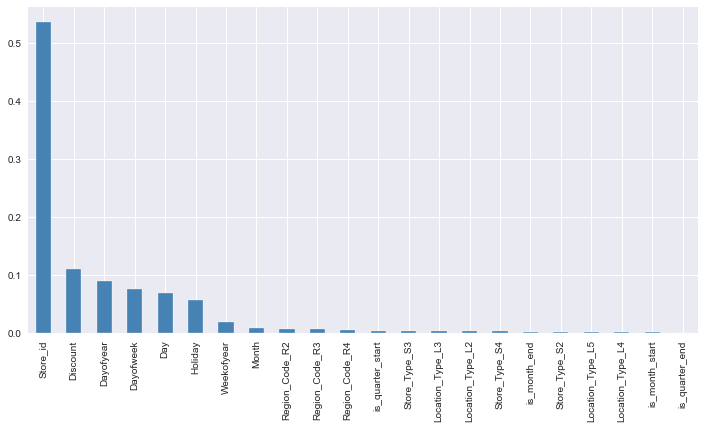

In [83]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

feat_imp = pd.Series(reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

<AxesSubplot:>

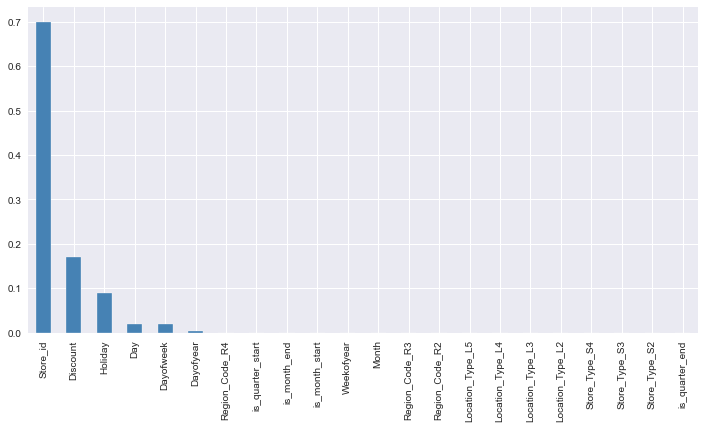

In [84]:
from sklearn.ensemble import RandomForestRegressor
rand_reg = RandomForestRegressor(n_estimators = 100, max_depth=5)
rand_reg.fit(X_train, y_train)

rand_feat_imp = pd.Series(rand_reg.feature_importances_, index=X_train.columns).sort_values(ascending=False)
rand_feat_imp.plot.bar(color='steelblue', figsize=(12, 6))

In [85]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
X_train_col=X_train.copy()

In [87]:
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

Features      VIF
13             Month  3550.39
15         Dayofyear  3288.85
16        Weekofyear   170.15
0           Store_id    69.56
14               Day    23.12
5      Store_Type_S4     4.34
6   Location_Type_L2     3.31
17         Dayofweek     3.25
10    Region_Code_R2     2.09
3      Store_Type_S2     2.01
9   Location_Type_L5     1.92
11    Region_Code_R3     1.91
21    is_quarter_end     1.87
2           Discount     1.86
7   Location_Type_L3     1.67
19      is_month_end     1.66
18    is_month_start     1.65
12    Region_Code_R4     1.63
4      Store_Type_S3     1.56
20  is_quarter_start     1.52
8   Location_Type_L4     1.38
1            Holiday     1.17

In [88]:
X_train_col.drop('Dayofyear',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features     VIF
13             Month  180.49
15        Weekofyear  164.49
0           Store_id   19.12
14               Day    5.85
5      Store_Type_S4    3.74
16         Dayofweek    3.16
6   Location_Type_L2    2.59
10    Region_Code_R2    2.02
3      Store_Type_S2    1.92
20    is_quarter_end    1.85
11    Region_Code_R3    1.84
2           Discount    1.83
18      is_month_end    1.65
17    is_month_start    1.64
9   Location_Type_L5    1.62
12    Region_Code_R4    1.58
4      Store_Type_S3    1.55
19  is_quarter_start    1.52
7   Location_Type_L3    1.49
8   Location_Type_L4    1.24
1            Holiday    1.17

In [89]:
X_train_col.drop('Month',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0           Store_id  16.59
13               Day   4.96
14        Weekofyear   3.99
5      Store_Type_S4   3.71
15         Dayofweek   3.15
6   Location_Type_L2   2.55
10    Region_Code_R2   2.02
3      Store_Type_S2   1.91
11    Region_Code_R3   1.83
2           Discount   1.83
17      is_month_end   1.65
16    is_month_start   1.64
9   Location_Type_L5   1.60
12    Region_Code_R4   1.58
4      Store_Type_S3   1.55
18  is_quarter_start   1.52
19    is_quarter_end   1.52
7   Location_Type_L3   1.48
8   Location_Type_L4   1.23
1            Holiday   1.17

In [ ]:
X_train_col.drop('Dayofyear',axis=1, inplace=True)
vif = pd.DataFrame()
X = X_train_col
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [90]:

X_train_1=sm.add_constant(X_train_col)    # Adding constant
X_train_1.shape

(133225, 21)

In [91]:
lm_1 = sm.OLS(y_train,X_train_1).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 1.253e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:18:05   Log-Likelihood:            -1.1856e+05
No. Observations:              133225   AIC:                         2.372e+05
Df Residuals:                  133204   BIC:                         2.374e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2927      0.014  

In [92]:
#Removing kw_max_min and building model
X_train_2=X_train_1.drop('Region_Code_R3', axis=1)   

### Model 2

In [93]:
lm_2 = sm.OLS(y_train,X_train_2).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 1.319e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:18:20   Log-Likelihood:            -1.1856e+05
No. Observations:              133225   AIC:                         2.372e+05
Df Residuals:                  133205   BIC:                         2.373e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2928      0.013  

In [94]:
#Removing kw_max_min and building model
X_train_3=X_train_2.drop('Region_Code_R2', axis=1)   

### Model 3

In [95]:
lm_3 = sm.OLS(y_train,X_train_3).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                 1.392e+04
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:18:31   Log-Likelihood:            -1.1856e+05
No. Observations:              133225   AIC:                         2.371e+05
Df Residuals:                  133206   BIC:                         2.373e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -2.2921      0.013  

In [ ]:
#Removing kw_max_min and building model
X_train_4=X_train_3.drop('is_month_end', axis=1) 

### model 4

In [ ]:
lm_4 = sm.OLS(y_train,X_train_4).fit()
print(lm_4.summary())

In [96]:
#Predict values
y_train_pred_scaled = lm_3.predict(X_train_3)

In [97]:
y_train_scaled_arr = y_train.values.ravel()
print(y_train_scaled_arr.shape)

(133225,)


In [98]:
res=y_train_scaled_arr- y_train_pred_scaled

Text(0, 0.5, 'residual')

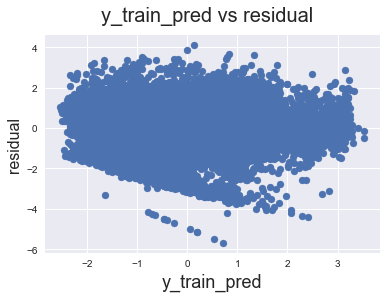

In [99]:
fig = plt.figure()
plt.scatter(y_train_pred_scaled,res)
fig.suptitle('y_train_pred vs residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train_pred', fontsize=18)                          # X-label
plt.ylabel('residual', fontsize=16) 

Text(0.5, 0, 'Errors')

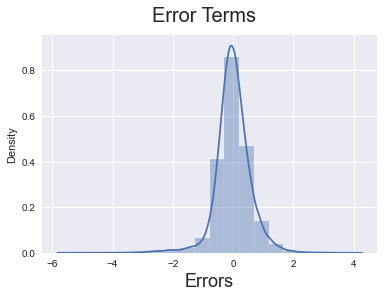

In [100]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

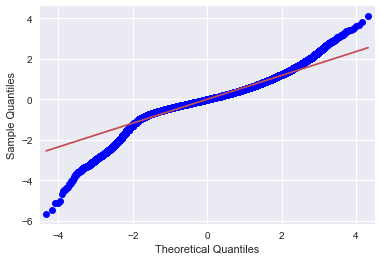

In [101]:
sm.qqplot(res,line='s')
plt.show()

In [102]:
residual_results=pd.DataFrame()
residual_results['Actual'] = y_train
residual_results['predicted'] = y_train_pred_scaled.values
residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
residual_results['sales']=train['Sales'].values
residual_results['predicted_sales'] = pt.inverse_transform(y_train_pred_scaled[:, np.newaxis])

In [103]:
residual_results.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1000001 -2.790544  -0.340669 -2.449875   7011.84     34875.003695
T1000115 -1.563447   0.309827 -1.873273  18137.52     46166.131896
T1000128  0.871821   1.041301 -0.169480  57288.00     60893.650775
T1000097  0.693251  -0.058871  0.752123  53615.52     39559.696355
T1000133 -0.251945   0.113729 -0.365674  36316.08     42584.786146

In [104]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    msle = metrics.mean_squared_log_error(y_true,y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    print('MSLE: ', round(msle,4))

In [106]:
regression_results(residual_results['sales'].values, residual_results['predicted_sales'].values)

explained_variance:  0.6775
r2:  0.6761
MAE:  7199.6399
MSE:  105155120.5546
RMSE:  10254.5171
MSLE:  0.1001


In [107]:
from sklearn.model_selection import GridSearchCV


In [332]:
from xgboost import XGBRegressor

xgbr_pipeline = Pipeline([("xgbr_model", XGBRegressor(objective="reg:squarederror", verbosity=1, 
                                                      random_state=42, n_jobs=-1))])

xgbr_pipeline_params = {
                        "xgbr_model__max_depth": [3],
                        "xgbr_model__learning_rate": [0.005,0.1],
                    }

xgbr_grid_pipeline = GridSearchCV(xgbr_pipeline, xgbr_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 10, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
xgbr_grid_pipeline.fit(X_train,y_train)
print(xgbr_grid_pipeline.best_params_)
xgbr_model = xgbr_grid_pipeline.best_estimator_
print(xgbr_grid_pipeline.best_score_)


Fitting 10 folds for each of 2 candidates, totalling 20 fits
{'xgbr_model__learning_rate': 0.1, 'xgbr_model__max_depth': 3}
-0.3395184975101331


In [333]:
y_train_pred_xgbr = xgbr_model.predict(X_train)

In [334]:
xgbr_residual = pd.DataFrame()
xgbr_residual['Actual'] = y_train
xgbr_residual['predicted'] = y_train_pred_xgbr
xgbr_residual['residual'] = xgbr_residual['Actual'] - xgbr_residual['predicted']
xgbr_residual['sales'] = train['Sales'].values
xgbr_residual['predicted_sales'] =  pt.inverse_transform(y_train_pred_xgbr[:,np.newaxis]).ravel()
xgbr_residual.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1000001 -2.790544  -0.145042 -2.645503   7011.84     38093.789062
T1000115 -1.563447   0.199262 -1.762709  18137.52     44127.953125
T1000128  0.871821   0.605730  0.266091  57288.00     51862.804688
T1000097  0.693251  -0.073524  0.766776  53615.52     39308.339844
T1000133 -0.251945   0.176180 -0.428126  36316.08     43708.628906

In [111]:
# from sklearn.feature_selection import SelectKBest, f_classif
# from sklearn.neighbors import KNeighborsRegressor


# knn_pipeline = Pipeline([("knn", KNeighborsRegressor())])

# knn_pipeline_params = {'knn__n_neighbors': list(range(40,100,30))}

# knn_grid_pipeline = GridSearchCV(knn_pipeline, knn_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# knn_grid_pipeline.fit(X_train, y_train)
# print(knn_grid_pipeline.best_params_)
# knn_model = knn_grid_pipeline.best_estimator_
# print(knn_grid_pipeline.best_score_)


In [112]:
# y_train_pred_knn = knn_model.predict(X_train)

In [113]:
# knn_residual = pd.DataFrame()
# knn_residual['Actual'] = y_train
# knn_residual['predicted'] = y_train_pred_knn
# knn_residual['residual'] = knn_residual['Actual'] - knn_residual['predicted']
# knn_residual['sales'] = train['Sales'].values
# knn_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_knn[:,np.newaxis]).ravel()
# knn_residual.head()

In [335]:
from sklearn.feature_selection import SelectFromModel

rf_pipeline = Pipeline([("rfr", RandomForestRegressor(criterion='mse', random_state=100, max_features='sqrt',n_jobs=-1,verbose=1))])

rf_pipeline_params = {"rfr__n_estimators":[100,200],
           "rfr__max_leaf_nodes":[30,60],
            "rfr__bootstrap":[True ,False]}

rf_grid_pipeline = GridSearchCV(rf_pipeline, rf_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 10, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
rf_grid_pipeline.fit(X_train, y_train)
print(rf_grid_pipeline.best_params_)
rf_model = rf_grid_pipeline.best_estimator_
print(rf_grid_pipeline.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    8.7s


{'rfr__bootstrap': True, 'rfr__max_leaf_nodes': 60, 'rfr__n_estimators': 200}
-0.3957097421247031


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    9.4s finished


In [337]:
y_train_pred_rf = rf_model.predict(X_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s finished


In [338]:
rf_residual = pd.DataFrame()
rf_residual['Actual'] = y_train
rf_residual['predicted'] = y_train_pred_rf
rf_residual['residual'] = rf_residual['Actual'] - rf_residual['predicted']
rf_residual['sales'] = train['Sales'].values
rf_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_rf[:,np.newaxis]).ravel()
rf_residual.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1000001 -2.790544  -0.232169 -2.558375   7011.84     36641.526600
T1000115 -1.563447   0.138450 -1.701897  18137.52     43027.793391
T1000128  0.871821   0.478424  0.393397  57288.00     49368.669867
T1000097  0.693251   0.001865  0.691386  53615.52     40610.657107
T1000133 -0.251945   0.022899 -0.274844  36316.08     40978.052287

In [117]:
# from sklearn.tree import DecisionTreeRegressor
# dt_pipeline = Pipeline([("dtr",  DecisionTreeRegressor(criterion='mse', random_state=100, max_features='sqrt'))])

# dt_pipeline_params = {"dtr__max_depth":[5,7],
#            "dtr__max_leaf_nodes":[30,60]}

# dt_grid_pipeline = GridSearchCV(dt_pipeline, dt_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# dt_grid_pipeline.fit(X_train, y_train)
# print(dt_grid_pipeline.best_params_)
# dt_model = dt_grid_pipeline.best_estimator_
# print(dt_grid_pipeline.best_score_)


In [118]:
# y_train_pred_dt = dt_model.predict(X_train)

In [119]:
# dt_residual = pd.DataFrame()
# dt_residual['Actual'] = y_train
# dt_residual['predicted'] = y_train_pred_dt
# dt_residual['residual'] = dt_residual['Actual'] - dt_residual['predicted']
# dt_residual['sales'] = train['Sales'].values
# dt_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_dt[:,np.newaxis]).ravel()
# dt_residual.head()

In [395]:
# from sklearn.ensemble import ExtraTreesRegressor
# et_pipeline = Pipeline([("etr",ExtraTreesRegressor(criterion='mse', random_state=100, max_features='sqrt',n_jobs=-1,verbose=1))])

# et_pipeline_params = {"etr__n_estimators":[200],
#            "etr__max_leaf_nodes":[30,60],
#             "etr__bootstrap":[True],
#             "etr__max_depth":[5,7]}

# et_grid_pipeline = GridSearchCV(et_pipeline, et_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 10, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# et_grid_pipeline.fit(X_train, y_train)
# print(et_grid_pipeline.best_params_)
# et_model = et_grid_pipeline.best_estimator_
# print(et_grid_pipeline.best_score_)

In [396]:
# y_train_pred_et = et_model.predict(X_train)

In [397]:
# et_residual = pd.DataFrame()
# et_residual['Actual'] = y_train
# et_residual['predicted'] = y_train_pred_et
# et_residual['residual'] = et_residual['Actual'] - et_residual['predicted']
# et_residual['sales'] = train['Sales'].values
# et_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_et[:,np.newaxis]).ravel()
# et_residual.head()

In [341]:
from sklearn.ensemble import GradientBoostingRegressor
gb_pipeline = Pipeline([("gbr",  GradientBoostingRegressor(loss='ls', subsample = 0.9, random_state=100, max_features='sqrt'))])

gb_pipeline_params = {"gbr__n_estimators":[200],
                      "gbr__learning_rate":[0.005,0.1],
                      "gbr__max_depth":[3,5],
                      "gbr__max_leaf_nodes":[30,60]}

gb_grid_pipeline = GridSearchCV(gb_pipeline, gb_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 10, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
gb_grid_pipeline.fit(X_train, y_train)
print(gb_grid_pipeline.best_params_)
gb_model = gb_grid_pipeline.best_estimator_
print(gb_grid_pipeline.best_score_)

Fitting 10 folds for each of 8 candidates, totalling 80 fits
{'gbr__learning_rate': 0.1, 'gbr__max_depth': 3, 'gbr__max_leaf_nodes': 30, 'gbr__n_estimators': 200}
-0.34592824521435855


In [342]:
y_train_pred_gb = gb_model.predict(X_train)

In [343]:
gb_residual = pd.DataFrame()
gb_residual['Actual'] = y_train
gb_residual['predicted'] = y_train_pred_gb
gb_residual['residual'] = gb_residual['Actual'] - gb_residual['predicted']
gb_residual['sales'] = train['Sales'].values
gb_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_gb[:,np.newaxis]).ravel()
gb_residual.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1000001 -2.790544  -0.181719 -2.608825   7011.84     37478.771769
T1000115 -1.563447   0.195290 -1.758737  18137.52     44055.638427
T1000128  0.871821   0.532998  0.338823  57288.00     50429.853030
T1000097  0.693251   0.138441  0.554810  53615.52     43027.634259
T1000133 -0.251945   0.196497 -0.448442  36316.08     44077.602821

In [345]:
from sklearn.ensemble import BaggingRegressor
bag_pipeline = Pipeline([("bagr",BaggingRegressor(base_estimator = DecisionTreeRegressor() ,random_state=100, 
                                                  bootstrap = True, bootstrap_features = True, n_jobs=-1,verbose=1))])

bag_pipeline_params = {"bagr__n_estimators":[100]}

bag_grid_pipeline = GridSearchCV(bag_pipeline, bag_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 10, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
bag_grid_pipeline.fit(X_train, y_train)
print(bag_grid_pipeline.best_params_)
bag_model = bag_grid_pipeline.best_estimator_
print(bag_grid_pipeline.best_score_)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


KeyboardInterrupt: 

In [129]:
y_train_pred_bag = bag_model.predict(X_train)

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    1.6s remaining:    5.1s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    3.4s finished


In [130]:
bag_residual = pd.DataFrame()
bag_residual['Actual'] = y_train
bag_residual['predicted'] = y_train_pred_bag
bag_residual['residual'] = bag_residual['Actual'] - bag_residual['predicted']
bag_residual['sales'] = train['Sales'].values
bag_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_bag[:,np.newaxis]).ravel()
bag_residual.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1000001 -2.790544  -1.213906 -1.576638   7011.84     22334.030470
T1000115 -1.563447  -0.607216 -0.956231  18137.52     30732.017308
T1000128  0.871821   0.471797  0.400024  57288.00     49240.620926
T1000097  0.693251   0.214883  0.478369  53615.52     44412.932228
T1000133 -0.251945  -0.123126 -0.128819  36316.08     38463.808784

In [131]:
# from sklearn.ensemble import AdaBoostRegressor
# ada_pipeline = Pipeline([("adar", AdaBoostRegressor(random_state=100))])

# ada_pipeline_params = {"adar__n_estimators":[100,200],
#             "adar__learning_rate":[0.01, 0.1]}

# ada_grid_pipeline = GridSearchCV(ada_pipeline, ada_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# ada_grid_pipeline.fit(X_train, y_train)
# print(ada_grid_pipeline.best_params_)
# ada_model = ada_grid_pipeline.best_estimator_
# print(ada_grid_pipeline.best_score_)

In [132]:
# y_train_pred_ada = ada_model.predict(X_train)

In [133]:
# ada_residual = pd.DataFrame()
# ada_residual['Actual'] = y_train
# ada_residual['predicted'] = y_train_pred_ada
# ada_residual['residual'] = ada_residual['Actual'] - ada_residual['predicted']
# ada_residual['sales'] = train['Sales'].values
# ada_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_ada[:,np.newaxis]).ravel()
# ada_residual.head()

In [134]:
# from sklearn.svm import SVR

In [135]:
# svr_pipeline = Pipeline([("svr", SVR(kernel='rbf'))])
# svr_pipeline_params = {"svr__C":[0.01, 0.1]}

# svr_grid_pipeline = GridSearchCV(svr_pipeline, svr_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 5, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# svr_grid_pipeline.fit(X_train, y_train)
# print(svr_grid_pipeline.best_params_)
# svr_model = svr_grid_pipeline.best_estimator_
# print(svr_grid_pipeline.best_score_)

In [136]:
# y_train_pred_svr = svr_model.predict(X_train)

In [137]:
# svr_residual = pd.DataFrame()
# svr_residual['Actual'] = y_train
# svr_residual['predicted'] = y_train_pred_svr
# svr_residual['residual'] = svr_residual['Actual'] - svr_residual['predicted']
# svr_residual['sales'] = train['Sales'].values
# svr_residual['predicted_sales'] = pt.inverse_transform(y_train_pred_svr[:,np.newaxis]).ravel()
# svr_residual.head()

## Predictions on the test dataset

In [138]:
validation = data[data['Date']> datetime(2018,12,31)]

print(validation.shape)
validation["Store_id"].replace(avg_sales_by_store_id, inplace=True)
validation["Discount"].replace({'Yes':1,'No':0}, inplace=True)


(55115, 9)


In [139]:
validation.head()

Store_id Store_Type Location_Type Region_Code       Date  Holiday  \
ID                                                                            
T1133439   34206.0         S1            L3          R1 2019-01-01        1   
T1133282   45045.0         S3            L1          R3 2019-01-01        1   
T1133464   59613.0         S4            L2          R1 2019-01-01        1   
T1133497   38220.0         S1            L1          R2 2019-01-01        1   
T1133493   41928.0         S1            L1          R3 2019-01-01        1   

          Discount  #Order     Sales  
ID                                    
T1133439         1      54  36021.96  
T1133282         0      62  40927.41  
T1133464         1      84  50425.62  
T1133497         0      47  31112.88  
T1133493         1      55  41358.24

In [140]:
validation = encode_and_bind(validation,"Store_Type")
validation = encode_and_bind(validation,"Location_Type")
validation = encode_and_bind(validation,"Region_Code")

In [141]:

validation.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

validation.head()

Store_id       Date  Holiday  Discount  #Order     Sales  \
ID                                                                   
T1133439   34206.0 2019-01-01        1         1      54  36021.96   
T1133282   45045.0 2019-01-01        1         0      62  40927.41   
T1133464   59613.0 2019-01-01        1         1      84  50425.62   
T1133497   38220.0 2019-01-01        1         0      47  31112.88   
T1133493   41928.0 2019-01-01        1         1      55  41358.24   

          Store_Type_S2  Store_Type_S3  Store_Type_S4  Location_Type_L2  \
ID                                                                        
T1133439              0              0              0                 0   
T1133282              0              1              0                 0   
T1133464              0              0              1                 1   
T1133497              0              0              0                 0   
T1133493              0              0              0                 0   

          Location_Type_L3  Location_Type_L4  Location_Type_L5  \
ID                                                               
T1133439                 1                 0                 0   
T1133282                 0                 0                 0   
T1133464                 0                 0                 0   
T1133497                 0                 0                 0   
T1133493                 0                 0                 0   

          Region_Code_R2  Region_Code_R3  Region_Code_R4  
ID                                                        
T1133439               0               0               0  
T1133282               0               1               0  
T1133464               0               0               0  
T1133497               1               0               0  
T1133493               0               1               0

In [142]:
validation['Month'] = validation['Date'].dt.month
validation['Day'] = validation['Date'].dt.day
validation['Dayofyear'] = validation['Date'].dt.dayofyear
validation['Weekofyear'] = validation['Date'].dt.weekofyear
validation['Dayofweek'] = validation['Date'].dt.dayofweek
validation['is_month_start'] = validation['Date'].dt.is_month_start.astype(int)
validation['is_month_end'] = validation['Date'].dt.is_month_end.astype(int)
validation['is_quarter_start'] = validation['Date'].dt.is_quarter_start.astype(int)
validation['is_quarter_end'] = validation['Date'].dt.is_quarter_end.astype(int)

validation.drop(['Date', '#Order'], axis=1, inplace=True)


In [143]:
# validation['Dayofweek_sin_transform']=np.sin(2*math.pi*validation['Dayofweek']/6)
# validation['Dayofweek_cos_transform']=np.cos(2*math.pi*validation['Dayofweek']/6)
# validation['Month_sin_transform']=np.sin(2*math.pi*validation['Month']/12) 
# validation['Month_cos_transform']=np.cos(2*math.pi*validation['Month']/12)
# #we divide by 6 or 12 to have a period of 6 and 12 instead of 2pi

In [144]:
validation['Store_id'].values[:,np.newaxis]

array([[34206.],
       [45045.],
       [59613.],
       ...,
       [39495.],
       [29430.],
       [28269.]])

In [145]:
# store_id_scale_1=scaler.transform(validation['Store_id'].values[:,np.newaxis])
# store_id_scale_1[:5]

In [146]:
# validation['Store_id']=store_id_scale_1

In [147]:
sales_transform_val = pt.transform(validation['Sales'].values[:,np.newaxis])

In [148]:
y_validation = pd.Series(np.ravel(sales_transform_val), index=validation.index)
X_validation =validation.loc[:,validation.columns !='Sales']

In [149]:
X_validation.head()

Store_id  Holiday  Discount  Store_Type_S2  Store_Type_S3  \
ID                                                                    
T1133439   34206.0        1         1              0              0   
T1133282   45045.0        1         0              0              1   
T1133464   59613.0        1         1              0              0   
T1133497   38220.0        1         0              0              0   
T1133493   41928.0        1         1              0              0   

          Store_Type_S4  Location_Type_L2  Location_Type_L3  Location_Type_L4  \
ID                                                                              
T1133439              0                 0                 1                 0   
T1133282              0                 0                 0                 0   
T1133464              1                 1                 0                 0   
T1133497              0                 0                 0                 0   
T1133493              0                 0                 0                 0   

          Location_Type_L5  ...  Region_Code_R4  Month  Day  Dayofyear  \
ID                          ...                                          
T1133439                 0  ...               0      1    1          1   
T1133282                 0  ...               0      1    1          1   
T1133464                 0  ...               0      1    1          1   
T1133497                 0  ...               0      1    1          1   
T1133493                 0  ...               0      1    1          1   

          Weekofyear  Dayofweek  is_month_start  is_month_end  \
ID                                                              
T1133439           1          1               1             0   
T1133282           1          1               1             0   
T1133464           1          1               1             0   
T1133497           1          1               1             0   
T1133493           1          1               1             0   

          is_quarter_start  is_quarter_end  
ID                                          
T1133439                 1               0  
T1133282                 1               0  
T1133464                 1               0  
T1133497                 1               0  
T1133493                 1               0  

[5 rows x 22 columns]

In [150]:
# X_validation.drop(['Dayofweek', 'Month'], axis=1, inplace=True)


In [151]:
X_validation.shape

(55115, 22)

### Linear Regression Model

In [152]:

def plot_errors(model,X_input, y_actual, title):
    y_train_pred = model.predict(X_input)
    try:
        residu=y_actual.values.ravel()- y_train_pred.ravel() ##can use reshape(-1,1) instead of ravel to covert to (n,)
    except:
        residu=y_actual.values.ravel()- y_train_pred.values

    fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3,figsize=(16,4))

    ax1.scatter(y_train_pred,residu)
    ax1.set_xlabel('y_pred')                          # X-label
    ax1.set_ylabel('residual') 
    ax1.set_title('y_pred vs residual')

    sns.distplot((residu), bins = 20,ax=ax2)
    ax2.set_xlabel('Errors')                         # X-label
    ax2.set_title('Density plot of residuals')

    sm.qqplot(residu,line='s',ax=ax3)
    ax3.set_title('QQ Plot')
    plt.suptitle(title)
    plt.show()



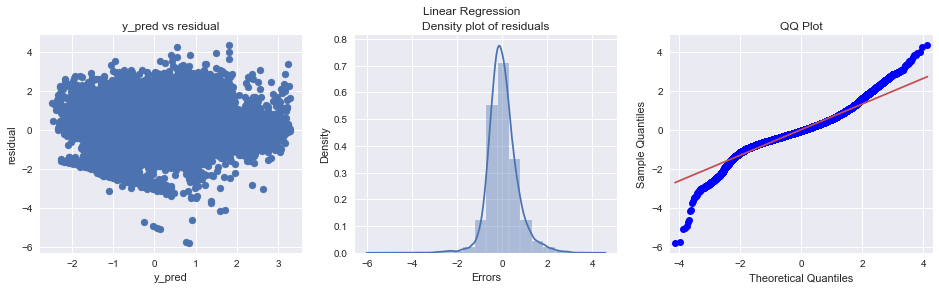

In [153]:
plot_errors(lm_3, sm.add_constant(X_validation)[X_train_3.columns], y_validation, 'Linear Regression')

In [154]:

def residual_errors(model,X_input, y_actual):
    y_train_pred = model.predict(X_input)
    residual_results=pd.DataFrame()
    residual_results['Actual'] =y_actual.values.ravel()
    residual_results['predicted'] = y_train_pred.ravel()
    residual_results['residual'] = residual_results['Actual'] - residual_results['predicted']
    residual_results['sales']= validation['Sales'].copy()
    residual_results['predicted_sales'] = pt.inverse_transform(y_train_pred[:, np.newaxis])
    residual_results.index = X_input.index
    return residual_results

In [155]:
test_residual_results_lr = residual_errors(lm_3, sm.add_constant(X_validation)[X_train_3.columns], y_validation)

In [156]:
test_residual_results_lr['sales'] = validation['Sales'].copy()
test_residual_results_lr.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1133439 -0.269899  -0.280106  0.010207  36021.96     35855.323967
T1133282  0.020006  -0.300377  0.320382  40927.41     35525.592703
T1133464  0.532782   1.101865 -0.569083  50425.62     62210.581264
T1133497 -0.581943  -0.669074  0.087131  31112.88     29810.343175
T1133493  0.044560   0.174292 -0.129732  41358.24     43674.427670

In [157]:
def regression_metrics(df, model):

    print("\n")
    print("Regression results for actual shares   : ", model, "\n")
    regression_results(df['sales'].values, df['predicted_sales'].values)

In [158]:
regression_metrics(test_residual_results_lr, 'Linear Regression')



Regression results for actual shares   :  Linear Regression 

explained_variance:  0.5904
r2:  0.5858
MAE:  8557.0592
MSE:  156978244.8473
RMSE:  12529.0959
MSLE:  0.1047


### XGBR on whole dataset

In [159]:
print(X_validation.shape)
print(y_validation.shape)

(55115, 22)
(55115,)


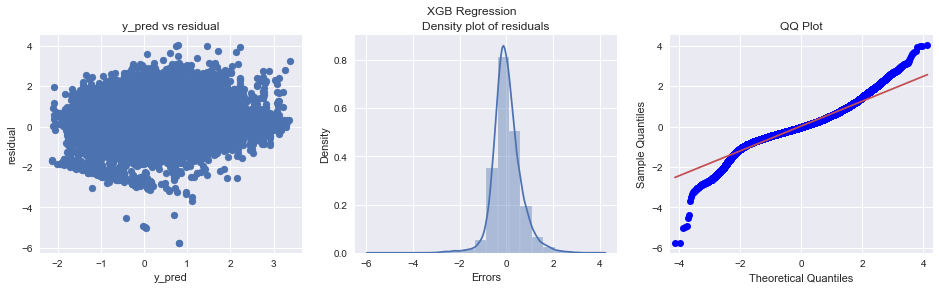

In [346]:
plot_errors(xgbr_model, X_validation, y_validation, 'XGB Regression')

In [347]:
test_residual_results_xgbr = residual_errors(xgbr_model,X_validation, y_validation)

test_residual_results_xgbr['sales'] = validation['Sales'].copy()
test_residual_results_xgbr.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1133439 -0.269899  -0.669323  0.399424  36021.96     29806.666016
T1133282  0.020006  -0.527229  0.547235  40927.41     31945.978516
T1133464  0.532782   0.178421  0.354361  50425.62     43749.242188
T1133497 -0.581943  -0.815574  0.233631  31112.88     27687.048828
T1133493  0.044560  -0.251129  0.295689  41358.24     36329.488281

In [348]:
regression_metrics(test_residual_results_xgbr, 'XGB Regression')



Regression results for actual shares   :  XGB Regression 

explained_variance:  0.6384
r2:  0.6333
MAE:  7992.5147
MSE:  138972782.6866
RMSE:  11788.6718
MSLE:  0.0939


### Random Forest Regressor

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


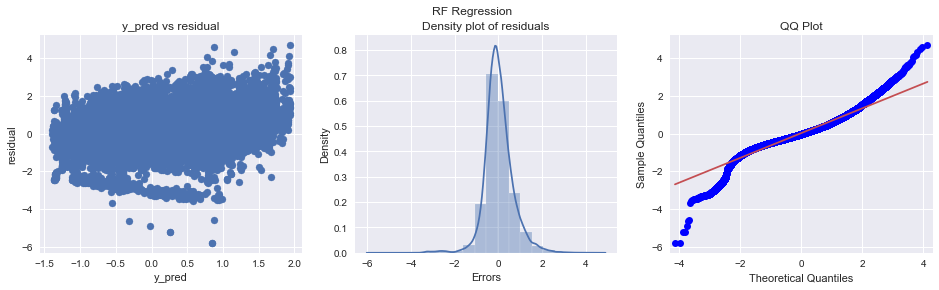

In [349]:
plot_errors(rf_model, X_validation, y_validation, 'RF Regression')

In [350]:
test_residual_results_rf = residual_errors(rf_model,X_validation, y_validation)
test_residual_results_rf['sales'] = validation['Sales'].copy()
test_residual_results_rf.head()

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.3s finished


Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1133439 -0.269899  -0.273158  0.003259  36021.96     35968.705694
T1133282  0.020006  -0.070937  0.090943  40927.41     39352.657459
T1133464  0.532782   0.499099  0.033683  50425.62     49769.276656
T1133497 -0.581943  -0.259452 -0.322491  31112.88     36192.947757
T1133493  0.044560   0.005407  0.039154  41358.24     40672.396744

In [351]:
regression_metrics(test_residual_results_rf, 'RF Regression')



Regression results for actual shares   :  RF Regression 

explained_variance:  0.5787
r2:  0.5718
MAE:  8492.66
MSE:  162283125.5507
RMSE:  12739.0394
MSLE:  0.1055


### DecisionTreeRegressor

In [166]:
# plot_errors(dt_model, X_validation, y_validation, 'DT Regression')


In [167]:
# test_residual_results_dt = residual_errors(dt_model,X_validation, y_validation)

In [168]:
# test_residual_results_dt['sales'] = validation['Sales'].copy()
# test_residual_results_dt.head()

In [169]:
# regression_metrics(test_residual_results_dt, 'dt Regression')

### ExtraTreesRegressor

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.1s finished


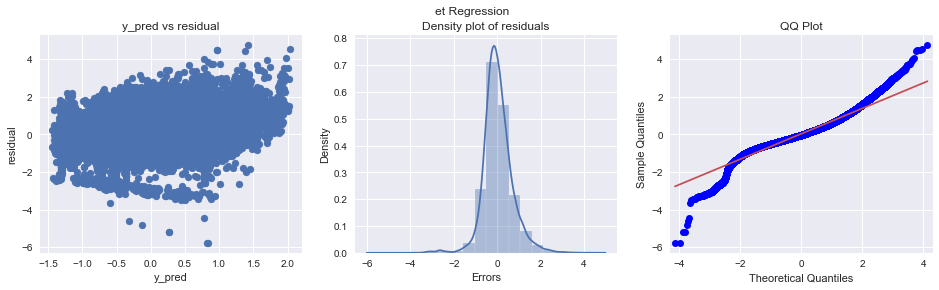

In [170]:
# plot_errors(et_model, X_validation, y_validation, 'et Regression')

In [171]:
# test_residual_results_et = residual_errors(et_model,X_validation, y_validation)


[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.2s finished


In [172]:
# test_residual_results_et['sales'] = validation['Sales'].copy()
# test_residual_results_et.head()  

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1133439 -0.269899  -0.190937 -0.078962  36021.96     37325.038851
T1133282  0.020006  -0.193203  0.213209  40927.41     37287.299361
T1133464  0.532782   0.614454 -0.081672  50425.62     52036.114376
T1133497 -0.581943  -0.425212 -0.156731  31112.88     33530.708702
T1133493  0.044560  -0.068073  0.112633  41358.24     39401.759251

In [173]:
# regression_metrics(test_residual_results_et, 'et Regression')



Regression results for actual shares   :  et Regression 

explained_variance:  0.5488
r2:  0.5393
MAE:  8830.3305
MSE:  174595843.4055
RMSE:  13213.472
MSLE:  0.1094


### GradientBoostingRegressor

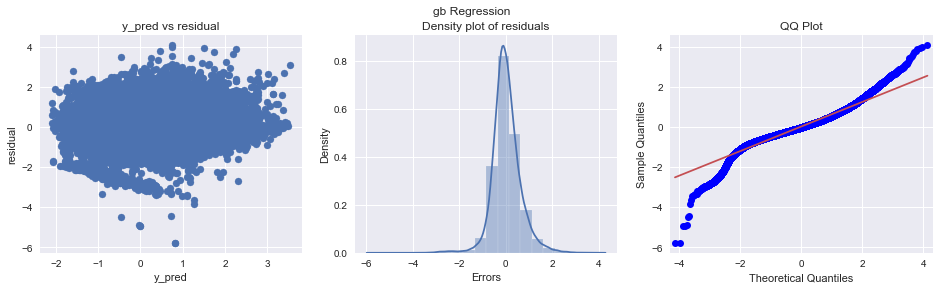

In [352]:
plot_errors(gb_model, X_validation, y_validation, 'gb Regression')

In [353]:
test_residual_results_gb = residual_errors(gb_model,X_validation, y_validation)

In [354]:
test_residual_results_gb['sales'] = validation['Sales'].copy()
test_residual_results_gb.head()

Actual  predicted  residual     sales  predicted_sales
ID                                                                
T1133439 -0.269899  -0.410305  0.140406  36021.96     33765.695923
T1133282  0.020006  -0.356616  0.376621  40927.41     34619.286906
T1133464  0.532782   0.208219  0.324563  50425.62     44291.243735
T1133497 -0.581943  -0.405581 -0.176362  31112.88     33840.354219
T1133493  0.044560  -0.128282  0.172842  41358.24     38376.586851

In [355]:
regression_metrics(test_residual_results_gb, 'gb Regression')



Regression results for actual shares   :  gb Regression 

explained_variance:  0.645
r2:  0.6404
MAE:  7898.4819
MSE:  136275748.4441
RMSE:  11673.7204
MSLE:  0.0943


### Adaboost Regressor

In [178]:
# plot_errors(ada_model, X_validation, y_validation, 'ada Regression')

In [179]:
# test_residual_results_ada = residual_errors(ada_model,X_validation, y_validation)

In [180]:
# test_residual_results_ada['sales'] = validation['Sales'].copy()
# test_residual_results_ada.head()

In [181]:
# regression_metrics(test_residual_results_ada, 'ada Regression')

### BaggingRegressor

In [356]:
# plot_errors(bag_model, X_validation, y_validation, 'bag Regression')

In [358]:
# test_residual_results_bag = residual_errors(bag_model,X_validation, y_validation)

In [357]:
# test_residual_results_bag['sales'] = validation['Sales'].copy()
# test_residual_results_bag.head()

In [359]:
# regression_metrics(test_residual_results_bag, 'bag Regression')

### Stacking

In [360]:
stacking = pd.DataFrame()
stacking['lr']     = test_residual_results_lr['predicted'].values
stacking['xgbr']   = test_residual_results_xgbr['predicted'].values
stacking['rf']     = test_residual_results_rf['predicted'].values
#stacking['dt']     = test_residual_results_dt['predicted'].values
# stacking['et']     = test_residual_results_et['predicted'].values
stacking['gb']     = test_residual_results_gb['predicted'].values
#stacking['bag']     = test_residual_results_bag['predicted'].values
#stacking['ada']     = test_residual_results_ada['predicted'].values
#stacking['Holiday'] = X_validation['Holiday'].values
#stacking['Discount'] = X_validation['Discount'].values
stacking['actual'] = y_validation.values

In [361]:
stacking.head()

lr      xgbr        rf        gb    actual
0 -0.280106 -0.669323 -0.273158 -0.410305 -0.269899
1 -0.300377 -0.527229 -0.070937 -0.356616  0.020006
2  1.101865  0.178421  0.499099  0.208219  0.532782
3 -0.669074 -0.815574 -0.259452 -0.405581 -0.581943
4  0.174292 -0.251129  0.005407 -0.128282  0.044560

In [362]:
from sklearn.linear_model import ElasticNet

In [366]:
stack_pipeline = Pipeline([("elasticnet", ElasticNet(random_state=0))])

stack_pipeline_params = {'elasticnet__l1_ratio':[0,0.9, 1],
                            'elasticnet__alpha':[0.00001,0.5,1],
                           'elasticnet__fit_intercept':[True,False]}

stack_grid_pipeline = GridSearchCV(stack_pipeline, stack_pipeline_params, scoring= 'neg_mean_squared_error', 
                        cv = 2, 
                        return_train_score=True,
                        n_jobs=-1,
                        verbose = 1)
# fit
stack_grid_pipeline.fit(stacking[['lr','xgbr','rf', 'gb']],stacking['actual'])
print(stack_grid_pipeline.best_params_)
stack_model = stack_grid_pipeline.best_estimator_
print(stack_grid_pipeline.best_score_)

Fitting 2 folds for each of 18 candidates, totalling 36 fits
{'elasticnet__alpha': 1e-05, 'elasticnet__fit_intercept': False, 'elasticnet__l1_ratio': 1}
-0.3745114542106726


In [308]:
# from xgboost import XGBRegressor

# stack_xgbr_pipeline = Pipeline([("xgbr_model", XGBRegressor(objective="reg:squarederror", verbosity=1, 
#                                                       random_state=42, n_jobs=-1))])

# stack_xgbr_pipeline_params = {
#                         "xgbr_model__max_depth": [3, 5,],
#                         "xgbr_model__learning_rate": [0.03,0.1],
#                     }

# stack_xgbr_grid_pipeline = GridSearchCV(stack_xgbr_pipeline, stack_xgbr_pipeline_params, scoring= 'neg_mean_squared_error', 
#                         cv = 2, 
#                         return_train_score=True,
#                         n_jobs=-1,
#                         verbose = 1)
# # fit
# stack_xgbr_grid_pipeline.fit(stacking[['lr','xgbr','rf', 'gb',  'bag']],stacking['actual'])
# print(stack_xgbr_grid_pipeline.best_params_)
# stack_xgbr_model = xgbr_grid_pipeline.best_estimator_
# print(stack_xgbr_grid_pipeline.best_score_)

Fitting 2 folds for each of 4 candidates, totalling 8 fits
{'xgbr_model__learning_rate': 0.03, 'xgbr_model__max_depth': 3}
-0.39709710521730934


# Final Submission

In [244]:
unseen = pd.read_csv("TEST_FINAL.csv",index_col=0, parse_dates=['Date'])

print(unseen.shape)
unseen["Store_id"].replace(avg_sales_by_store_id, inplace=True)
unseen["Discount"].replace({'Yes':1,'No':0}, inplace=True)


(22265, 7)


In [245]:

unseen = encode_and_bind(unseen,"Store_Type")
unseen = encode_and_bind(unseen,"Location_Type")
unseen = encode_and_bind(unseen,"Region_Code")

In [246]:
unseen.drop(["Store_Type","Location_Type", "Region_Code"],axis=1,inplace=True)

unseen.head()

Store_id       Date  Holiday  Discount  Store_Type_S2  \
ID                                                                
T1188341   54291.0 2019-06-01        0         0              0   
T1188342   38886.0 2019-06-01        0         0              0   
T1188343   72951.0 2019-06-01        0         0              0   
T1188344   36102.0 2019-06-01        0         0              0   
T1188345   41193.0 2019-06-01        0         0              0   

          Store_Type_S3  Store_Type_S4  Location_Type_L2  Location_Type_L3  \
ID                                                                           
T1188341              0              1                 1                 0   
T1188342              0              0                 0                 0   
T1188343              0              1                 1                 0   
T1188344              0              0                 0                 0   
T1188345              0              0                 0                 0   

          Location_Type_L4  Location_Type_L5  Region_Code_R2  Region_Code_R3  \
ID                                                                             
T1188341                 0                 0               0               1   
T1188342                 0                 0               0               0   
T1188343                 0                 0               0               0   
T1188344                 0                 0               0               0   
T1188345                 0                 0               1               0   

          Region_Code_R4  
ID                        
T1188341               0  
T1188342               0  
T1188343               0  
T1188344               1  
T1188345               0

In [247]:
unseen['Month'] = unseen['Date'].dt.month
unseen['Day'] = unseen['Date'].dt.day
unseen['Dayofyear'] = unseen['Date'].dt.dayofyear
unseen['Weekofyear'] = unseen['Date'].dt.weekofyear
unseen['Dayofweek'] = unseen['Date'].dt.dayofweek
unseen['is_month_start'] = unseen['Date'].dt.is_month_start.astype(int)
unseen['is_month_end'] = unseen['Date'].dt.is_month_end.astype(int)
unseen['is_quarter_start'] = unseen['Date'].dt.is_quarter_start.astype(int)
unseen['is_quarter_end'] = unseen['Date'].dt.is_quarter_end.astype(int)

unseen.drop(['Date'], axis=1, inplace=True)


In [248]:
# unseen['Dayofweek_sin_transform']=np.sin(2*math.pi*unseen['Dayofweek']/6)
# unseen['Dayofweek_cos_transform']=np.cos(2*math.pi*unseen['Dayofweek']/6)
# unseen['Month_sin_transform']=np.sin(2*math.pi*unseen['Month']/12) 
# unseen['Month_cos_transform']=np.cos(2*math.pi*unseen['Month']/12)
# #we divide by 6 or 12 to have a period of 6 and 12 instead of 2pi

In [249]:
# store_id_scale_2=scaler.transform(unseen['Store_id'][:,np.newaxis])

In [250]:
# store_id_scale_2

In [251]:
# unseen.drop(['Dayofweek', 'Month'], axis=1, inplace=True)

In [252]:
# unseen['Store_id'] = store_id_scale_2

In [253]:
X_unseen =unseen.loc[:,unseen.columns !='Sales']

In [254]:
X_unseen.head()

Store_id  Holiday  Discount  Store_Type_S2  Store_Type_S3  \
ID                                                                    
T1188341   54291.0        0         0              0              0   
T1188342   38886.0        0         0              0              0   
T1188343   72951.0        0         0              0              0   
T1188344   36102.0        0         0              0              0   
T1188345   41193.0        0         0              0              0   

          Store_Type_S4  Location_Type_L2  Location_Type_L3  Location_Type_L4  \
ID                                                                              
T1188341              1                 1                 0                 0   
T1188342              0                 0                 0                 0   
T1188343              1                 1                 0                 0   
T1188344              0                 0                 0                 0   
T1188345              0                 0                 0                 0   

          Location_Type_L5  ...  Region_Code_R4  Month  Day  Dayofyear  \
ID                          ...                                          
T1188341                 0  ...               0      6    1        152   
T1188342                 0  ...               0      6    1        152   
T1188343                 0  ...               0      6    1        152   
T1188344                 0  ...               1      6    1        152   
T1188345                 0  ...               0      6    1        152   

          Weekofyear  Dayofweek  is_month_start  is_month_end  \
ID                                                              
T1188341          22          5               1             0   
T1188342          22          5               1             0   
T1188343          22          5               1             0   
T1188344          22          5               1             0   
T1188345          22          5               1             0   

          is_quarter_start  is_quarter_end  
ID                                          
T1188341                 0               0  
T1188342                 0               0  
T1188343                 0               0  
T1188344                 0               0  
T1188345                 0               0  

[5 rows x 22 columns]

### Linear Regression submission

In [255]:
linear_results =pd.DataFrame()
linear_results['lr']=  lm_3.predict(sm.add_constant(X_unseen)[X_train_3.columns])

In [256]:
submission_1_lr = pd.DataFrame()
submission_1_lr['ID'] = X_unseen.index
submission_1_lr['Sales'] = pt.inverse_transform(linear_results.lr.values[:, np.newaxis])

In [257]:
submission_1_lr.head()

ID         Sales
0  T1188341  49483.197904
1  T1188342  34932.394119
2  T1188343  67830.363570
3  T1188344  32684.805406
4  T1188345  36682.069279

In [258]:
submission_1_lr.to_csv("submission_1_lr.csv", index=False)

### XGBR submission

In [367]:
y_unseen_pred_xgbr = xgbr_model.predict(X_unseen)

In [368]:
submission_2_xgbr = pd.DataFrame()
submission_2_xgbr['ID'] = X_unseen.index
submission_2_xgbr['Sales'] = pt.inverse_transform(y_unseen_pred_xgbr[:, np.newaxis])

In [369]:
submission_2_xgbr.head()

ID         Sales
0  T1188341  55667.488281
1  T1188342  40576.007812
2  T1188343  73443.570312
3  T1188344  37518.023438
4  T1188345  42487.554688

In [370]:
submission_2_xgbr.to_csv("submission_2_xgbr.csv", index=False)

### RF submission

In [371]:
y_unseen_pred_rf = rf_model.predict(X_unseen)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [372]:
submission_3_rf = pd.DataFrame()
submission_3_rf['ID'] = X_unseen.index
submission_3_rf['Sales'] = pt.inverse_transform(y_unseen_pred_rf[:, np.newaxis])

In [373]:
submission_3_rf.head()

ID         Sales
0  T1188341  57685.415931
1  T1188342  41395.797973
2  T1188343  71868.190096
3  T1188344  38180.282730
4  T1188345  41781.629888

In [374]:
submission_3_rf.to_csv("submission_3_rf.csv", index=False)

### DT submission

In [375]:
# y_unseen_pred_dt = dt_model.predict(X_unseen)

In [268]:
# # submission_4_dt = pd.DataFrame()
# submission_4_dt['ID'] = X_unseen.index
# submission_4_dt['Sales'] = pt.inverse_transform(y_unseen_pred_dt[:, np.newaxis])

In [269]:
# submission_4_dt.head()

In [270]:
# submission_4_dt.to_csv("submission_4_dt.csv", index=False) # undnivvu,, vere analysis ki panikochiddi malli run cheyakunda

### ET submission

In [376]:
# y_unseen_pred_et = et_model.predict(X_unseen)


In [377]:
# submission_5_et = pd.DataFrame()
# submission_5_et['ID'] = X_unseen.index
# submission_5_et['Sales'] = pt.inverse_transform(y_unseen_pred_et[:, np.newaxis])

In [378]:
# submission_5_et.head()

In [379]:
# submission_5_et.to_csv("submission_5_et.csv", index=False)

### GB submission

In [380]:
y_unseen_pred_gb = gb_model.predict(X_unseen)

In [381]:
submission_6_gb = pd.DataFrame()
submission_6_gb['ID'] = X_unseen.index
submission_6_gb['Sales'] = pt.inverse_transform(y_unseen_pred_gb[:, np.newaxis])

In [382]:
submission_6_gb.head()

ID         Sales
0  T1188341  58461.086400
1  T1188342  40855.503981
2  T1188343  77361.797682
3  T1188344  38238.310778
4  T1188345  42416.712639

In [383]:
submission_6_gb.to_csv("submission_6_gb.csv", index=False)

### BAG submission

In [384]:
# y_unseen_pred_bag = bag_model.predict(X_unseen)

In [385]:
# submission_7_bag = pd.DataFrame()
# submission_7_bag['ID'] = X_unseen.index
# # submission_7_bag['Sales'] = pt.inverse_transform(y_unseen_pred_bag[:, np.newaxis])

In [387]:
# submission_7_bag.head()

In [388]:
# submission_7_bag.to_csv("submission_7_bag.csv", index=False)

### ADA submission

In [283]:
# y_unseen_pred_ada = ada_model.predict(X_unseen)

In [284]:
# submission_8_ada = pd.DataFrame()
# submission_8_ada['ID'] = X_unseen.index
# submission_8_ada['Sales'] = pt.inverse_transform(y_unseen_pred_ada[:, np.newaxis])

In [285]:
# submission_8_ada.head()

In [286]:
# submission_8_ada.to_csv("submission_8_ada.csv", index=False)

## Stacking on unseen dataset

In [389]:
unseen_stacking = pd.DataFrame()

unseen_stacking['lr']     = linear_results['lr'].values
unseen_stacking['xgbr']   = xgbr_model.predict(X_unseen)
unseen_stacking['rf']     = rf_model.predict(X_unseen)
# unseen_stacking['dt']     = dt_model.predict(X_unseen)
# unseen_stacking['et']     = et_model.predict(X_unseen)
unseen_stacking['gb']     = gb_model.predict(X_unseen)
# unseen_stacking['bag']    = bag_model.predict(X_unseen)
# unseen_stacking['ada']    = ada_model.predict(X_unseen)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.0s finished


In [390]:
unseen_stacking.head()

lr      xgbr        rf        gb
0  0.484344  0.793800  0.890775  0.927569
1 -0.337099 -0.000125  0.046694  0.015894
2  1.352932  1.592868  1.526546  1.754610
3 -0.479340 -0.179369 -0.139909 -0.136468
4 -0.229712  0.108285  0.068559  0.104314

In [391]:
stacking_submission = pd.DataFrame()
stacking_submission['ID']= X_unseen.index
stacking_submission['Sales'] = pt.inverse_transform(stack_model.predict(unseen_stacking)[:, np.newaxis]) 

In [392]:
stacking_submission.head()

ID         Sales
0  T1188341  59871.029300
1  T1188342  41596.739003
2  T1188343  79791.311755
3  T1188344  38442.190169
4  T1188345  43323.586669

In [394]:
stacking_submission.to_csv("submission_stacking_modified_elasticnet_final.csv", index= False)